In [2]:
import tensorflow as tf

import deeply
import deeply.datasets as dd
import deeply.plots as dp

In [ ]:
mnist, info = dd.load("mnist", with_info = True, shuffle_files = True, as_supervised = True)

In [ ]:
input_shape    = info.features['image'].shape
x, y, channels = input_shape

In [ ]:
gan = deeply.hub("convolutional-generative-adversarial-network", x = x, y = y, channels = channels)

In [ ]:
def norm(image):
    return tf.cast(image, tf.float32) / 255.0

data = dd.concat((mnist["train"], mnist["test"]), mapper = lambda image, label: norm(image))

In [ ]:
def generate_random_sample(gan, n_samples):
    generator = gan.generator
    generator_input_shape = generator.input.shape
    _, noise_dim = generator_input_shape
    
    random_sample = tf.random.normal([n_samples, noise_dim])
    
    return random_sample

In [ ]:
batch_size   = 32
epochs       = 30
data_batched = data.batch(batch_size)

In [ ]:
history = gan.fit(data_batched, epochs = epochs)

In [ ]:
random_samples = generate_random_sample(gan, 16)

In [ ]:
predictions    = gan.generator(random_samples, training = False)

In [ ]:
dp.imgplot(predictions * 255)

In [9]:
gan = deeply.hub("generative-adversarial-network", x = 144, y = 1, layer_depth = 4)

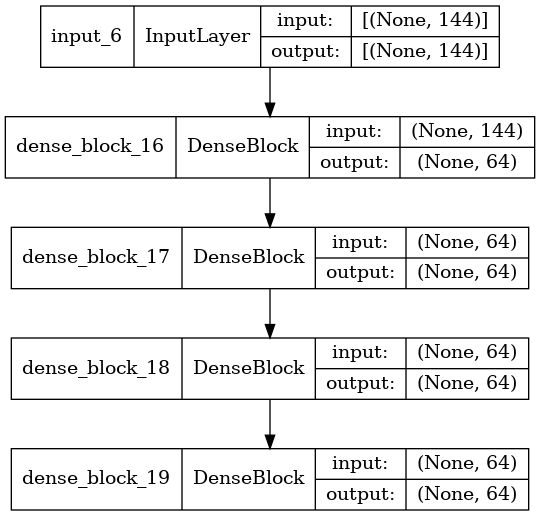

In [11]:
gan.